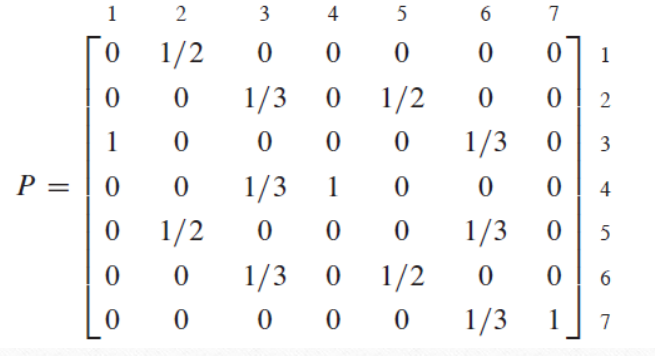

Consider a web graph represented by a transition matrix where webpages are denoted by numbers 1 to 7. A user starts navigating from Page 1 and eventually reaches Page 4. However, Page 4 has no outbound links, which means once a user lands on Page 4, they cannot navigate further. This issue of dangling nodes can cause problems as PageRank score gets trapped without being redistributed.

### Issue:
Dangling nodes: Pages with no outbound links can absorb PageRank score without redistributing it, leading to loss of importance for other pages.

### Solution:
To prevent loss of importance, redistribute the importance of dangling nodes evenly across all pages. This can be achieved by replacing the columns of the transition matrix corresponding to dangling nodes with uniform values.

Identify the dangling nodes in the network.

In [1]:
def dangling_nodes(m):
    d_nodes = []
    for i in range(len(m)):
        if m[i][i] == 1:
            d_nodes.append(i)
    return d_nodes

In [2]:
import numpy as np
P = np.array([[0, 1/2, 0, 0, 0, 0, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [1, 0, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 1, 0, 0, 0],
              [0, 1/2, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 0, 1/3, 1]])

n = dangling_nodes(P)

Now adjust the transition matrix where there are dangling nodes.

In [3]:
def adjustment1(matrix, d_nodes):
    for i in range(len(matrix)):
        if i in d_nodes:
            for j in range(len(matrix[0])):
                matrix[j][i] = 1/len(matrix)
    return matrix

In [4]:
m1 = adjustment1(P, n)

In [5]:
m1

array([[0.        , 0.5       , 0.        , 0.14285714, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.33333333, 0.14285714, 0.5       ,
        0.        , 0.14285714],
       [1.        , 0.        , 0.        , 0.14285714, 0.        ,
        0.33333333, 0.14285714],
       [0.        , 0.        , 0.33333333, 0.14285714, 0.        ,
        0.        , 0.14285714],
       [0.        , 0.5       , 0.        , 0.14285714, 0.        ,
        0.33333333, 0.14285714],
       [0.        , 0.        , 0.33333333, 0.14285714, 0.5       ,
        0.        , 0.14285714],
       [0.        , 0.        , 0.        , 0.14285714, 0.        ,
        0.33333333, 0.14285714]])

Another potential issue is the presence of cycles in the web graph. If two pages are linked only to each other, a user landing on either page would be stuck in loop between the two pages.

### Issue:
Loops in the web graph can trap users in cycles.

### Solution:

### Random Transition Probability matrix:

Introduce Random Transition Probability (H) where every element is 1/𝑛, ensuring equal probability of teleportation to any page.
Adjust the transition matrix (A) by combining it with Random Transition Probability.

##### Google Matrix (G):
Create a Google Matrix (G) by combining the adjusted transition matrix (A) with the Random Transition Probability.

**((1−p)×H)**: Randomly jumping to any page with probability (1−p), ensuring uniform distribution.

**(p×A)**: Following links with probability 𝑝 based on PageRank scores and link structure represented by matrix 𝐴

Equation:
**G = ((1−p)×H) + (p×A)**

In [6]:
# Random transition probability matrix
K = 1/len(m1)/np.ones((len(m1), len(m1)))

In [7]:
K

array([[0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714]])

Setting random probability p, for the Google matrix G.

In [8]:
import random
p = random.uniform(0.6, 0.9)
p

0.7612836184192273

Implementing google matrix

In [9]:
def adjustment2(matrix, p, K):
    result = p*matrix + (1-p)*K
    return result

In [10]:
m2 = adjustment2(m1, p, K)

Finding the Steady-State vector

In [11]:
def steady_state_vector(vector, A):
    n = 100
    count = 0
    vector = np.array(vector)  # Convert vector to numpy array
    for i in range(n):
        pvector = np.round(np.dot(A, vector), 8)
        if np.array_equal(vector, pvector):
            count += 1
        else:
            count = 0
        if count == 10:
            print("Number of iterations:", i)
            break
        vector = pvector
    print(vector)
    print("\nRank of each page")
    for i in range(len(vector)):
        print(f"Page {i+1}: {vector[i]}")

In [12]:
a = [1, 0, 0, 0, 0, 0, 0]
steady_state_vector(a, m2)

Number of iterations: 29
[0.11887814 0.16506033 0.18843517 0.10386681 0.16076405 0.16506033
 0.09793519]

Rank of each page
Page 1: 0.11887814
Page 2: 0.16506033
Page 3: 0.18843517
Page 4: 0.10386681
Page 5: 0.16076405
Page 6: 0.16506033
Page 7: 0.09793519
